In [1]:
!pip install pandas matplotlib seaborn scikit-learn torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


**Q1. Load & Preprocess the Data**

In [3]:
# loading the dataset into pandas dataframe
df=pd.read_csv('/content/IRIS.csv')

In [4]:
df.head()      # first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()   # last 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape      # finding no. of rows and columns

(150, 5)

In [7]:
df.isnull().sum()       # finding any missing value

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [8]:
# counting how many times each species is appearing in this column
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [9]:
# loading the label encoder function
label_encoder=LabelEncoder()


In [10]:
labels=label_encoder.fit_transform(df.species)

In [11]:
df['species']=labels

In [12]:

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [14]:
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


0------  Iris-setosa   

1------   ris-versicolor	     

2------Iris-virginica

In [15]:
#  separating the dataset into feature and target
x=df.drop(columns='species', axis=1)
y=df['species']

In [16]:

# splitting the dataset into training and testing data
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [17]:
print(x.shape, x_train.shape, x_test.shape)

(150, 4) (120, 4) (30, 4)


In [18]:
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [19]:
# finding standard deviation
print(df.std())

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
species         0.819232
dtype: float64


In [20]:
# loading standardscaler to standarised data
Scaler=StandardScaler()

In [21]:

# fit training data to scaler
Scaler.fit(x_train)

StandardScaler()

In [22]:
standarised_data=Scaler.transform(x_train)

In [23]:
# Convert to PyTorch Tensors
x_train_tensor=torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train.values,dtype=torch.long)
x_test_tensor=torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test.values,dtype=torch.long)


**Q2.Visualize the Data**

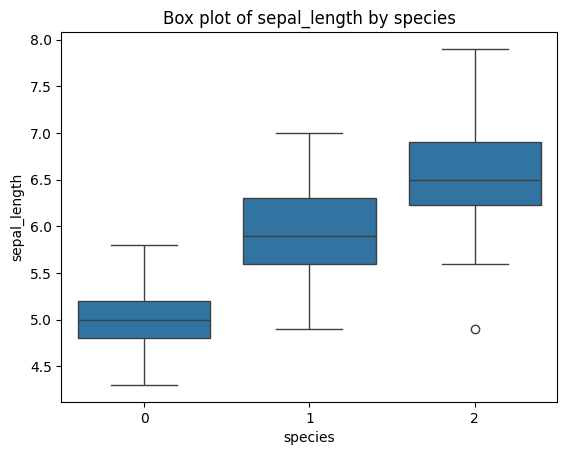

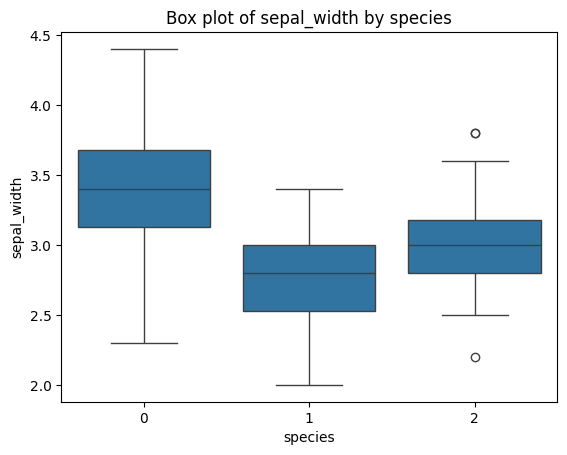

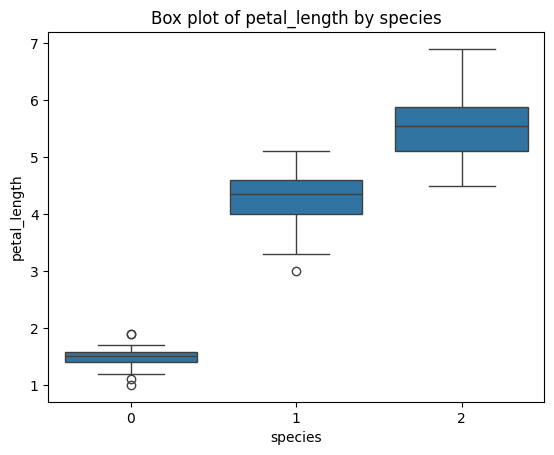

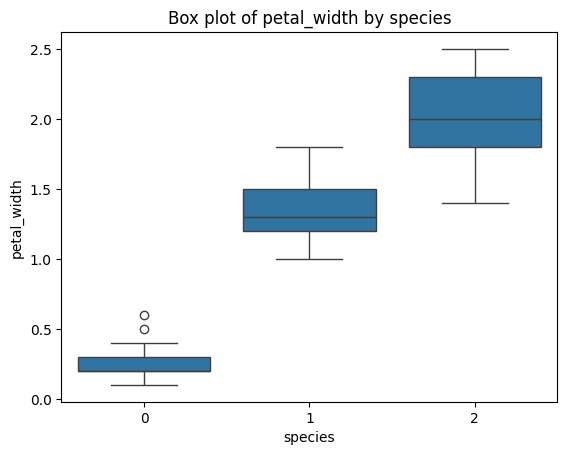

In [24]:
#  Create box plots for each feature
for column in df.columns[:-1]:
 sns.boxplot(x='species',y=column, data=df)
 plt.title(f'Box plot of {column} by species')
 plt.show()

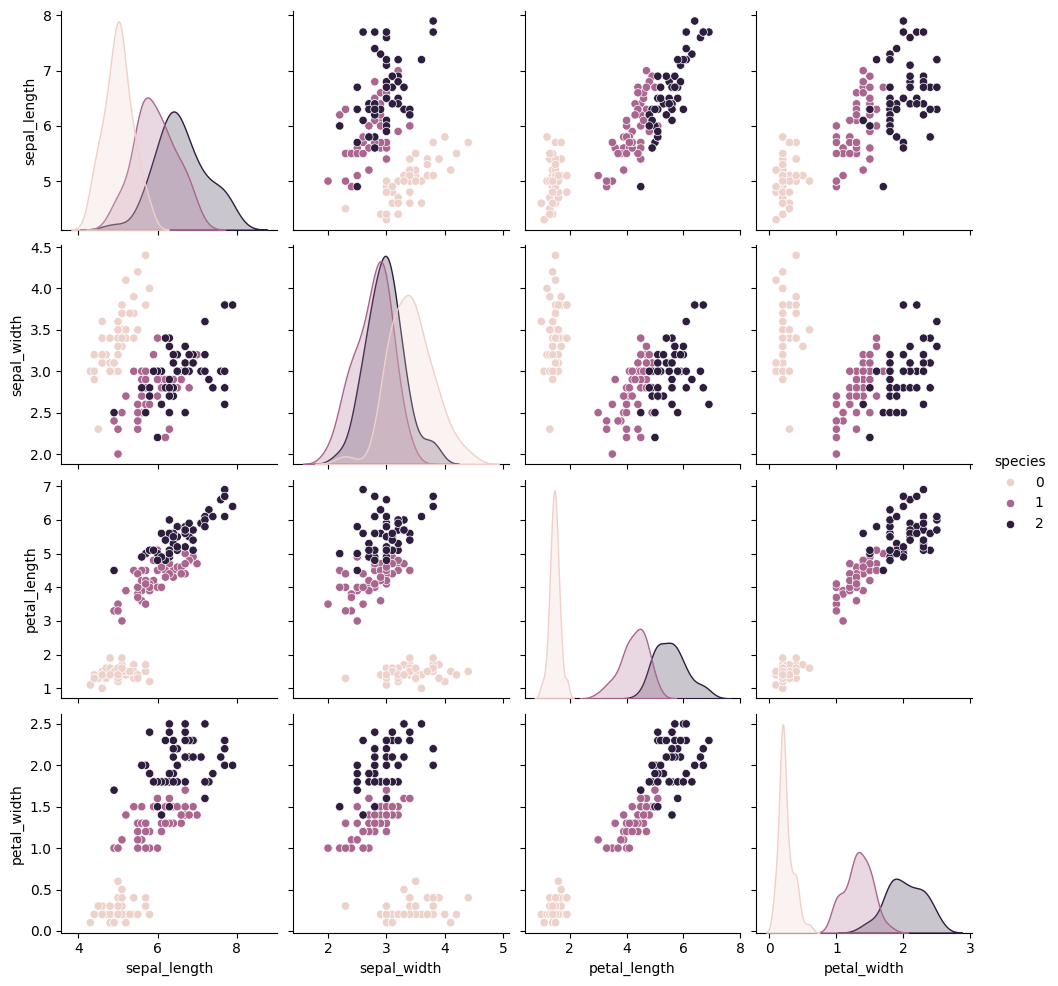

In [25]:
# : Create a pairplot (scatterplot matrix) of all features, colored by species
sns.pairplot(df,hue='species')
plt.show()

**Q3. Build the Neural Network**

In [26]:
import torch.nn as nn

class IrisNN(nn.Module):    # Inherit from PyTorch's Module class
    def __init__(self):
        super(IrisNN, self).__init__()
        self.fc1 = nn.Linear(4, 16)    # Input layer → Hidden layer
        self.relu = nn.ReLU()         # Activation function
        self.fc2 = nn.Linear(16, 3)   # Hidden layer → Output

    def forward(self, x):             # ✅ OUTSIDE __init__, properly indented
        x = self.fc1(x)               # First linear layer
        x = self.relu(x)              # Apply ReLU
        x = self.fc2(x)               # Output layer
        return x


In [27]:
#  CrossEntropyLoss as the loss function.
model=IrisNN()
criterion=nn.CrossEntropyLoss()       # multi class classification

In [28]:
# Use an optimizer such as SGD or Adam
optimizer=optim.Adam(model.parameters(),lr=0.01)

**Q4. Train the Model**

In [29]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(1, 101):  # 100 epochs
    # Training
    model.train()
    optimizer.zero_grad()          # Clear gradients
    outputs = model(x_train_tensor)       # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Compute loss
    loss.backward()               # Backpropagation
    optimizer.step()              # Update weights

    # Save training loss
    train_losses.append(loss.item())

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_train).sum().item() / len(y_train)
    train_accuracies.append(accuracy)

    # Evaluate on test data every 10 epochs
    if epoch % 10 == 0:
        model.eval()
        test_outputs = model(x_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())

        _, test_predicted = torch.max(test_outputs, 1)
        test_accuracy = (test_predicted == y_test).sum().item() / len(y_test_tensor)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch}: Train Loss = {loss.item():.4f}, "
              f"Test Loss = {test_loss.item():.4f}, "
              f"Train Acc = {accuracy:.4f}, Test Acc = {test_accuracy:.4f}")


Epoch 10: Train Loss = 1.0222, Test Loss = 1.0334, Train Acc = 0.0000, Test Acc = 0.0000
Epoch 20: Train Loss = 0.7242, Test Loss = 0.6908, Train Acc = 0.0000, Test Acc = 0.0000
Epoch 30: Train Loss = 0.5347, Test Loss = 0.4767, Train Acc = 0.0000, Test Acc = 0.0000
Epoch 40: Train Loss = 0.4158, Test Loss = 0.3537, Train Acc = 0.0000, Test Acc = 0.0000
Epoch 50: Train Loss = 0.3302, Test Loss = 0.2773, Train Acc = 0.0000, Test Acc = 0.0000
Epoch 60: Train Loss = 0.2634, Test Loss = 0.2190, Train Acc = 0.0000, Test Acc = 0.0000
Epoch 70: Train Loss = 0.2121, Test Loss = 0.1757, Train Acc = 0.0000, Test Acc = 0.0000
Epoch 80: Train Loss = 0.1751, Test Loss = 0.1449, Train Acc = 0.0000, Test Acc = 0.0000
Epoch 90: Train Loss = 0.1489, Test Loss = 0.1203, Train Acc = 0.0000, Test Acc = 0.0000
Epoch 100: Train Loss = 0.1302, Test Loss = 0.1031, Train Acc = 0.0000, Test Acc = 0.0000


**Q5. Create the Following Plots**

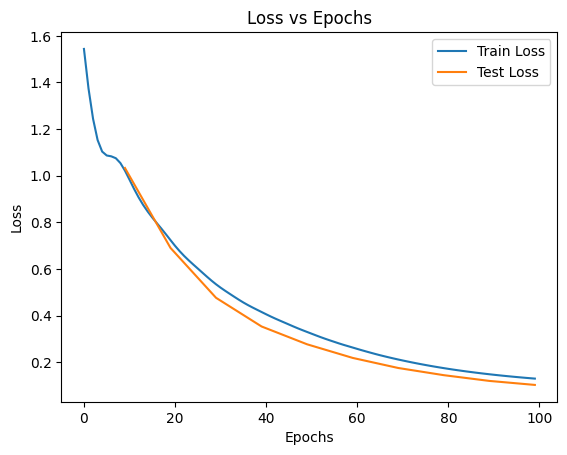

In [30]:
# Plot 1: Training and test loss vs. epochs
plt.plot(train_losses, label='Train Loss')
plt.plot(range(9, 100, 10), test_losses, label='Test Loss')  # Plot every 10th
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss vs Epochs")
plt.show()


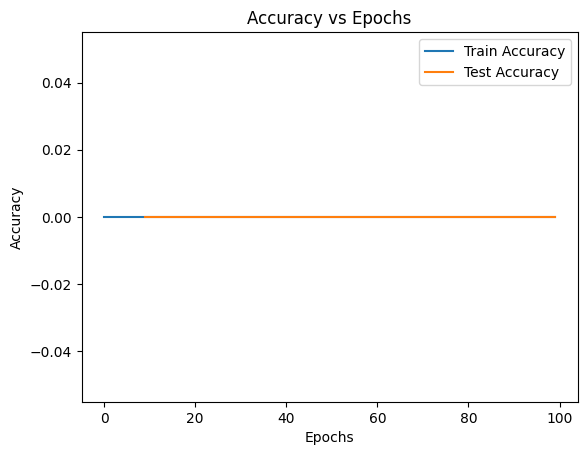

In [31]:
# Plot 2: Training and test accuracy vs. epochs
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(range(9, 100, 10), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy vs Epochs")
plt.show()


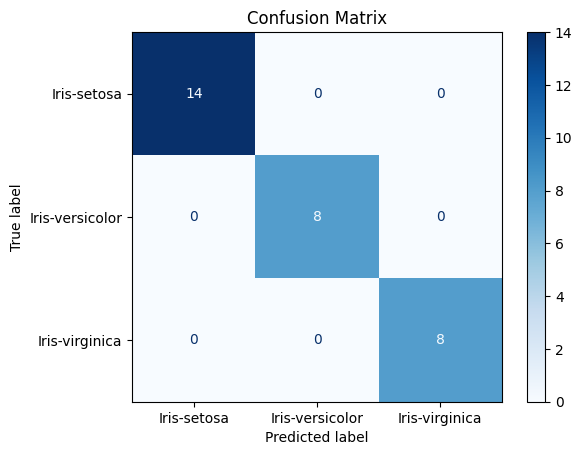

In [32]:
# Plot 3: Final confusion matrix (visualized as a heatmap with class labels)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.eval()
final_preds = model(x_test_tensor)
_, predicted_labels = torch.max(final_preds, 1)
cm = confusion_matrix(y_test_tensor, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
